In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split


In [37]:
train_data = pd.read_csv(r"C:\Users\chuds\OneDrive\Skrivebord\house-train.csv")

train_df = pd.DataFrame(train_data)

train_df.head()
train_df.columns





Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

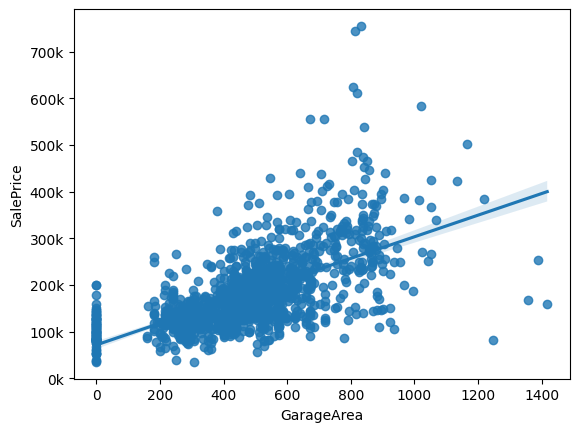

In [44]:

## Correlation between LotArea and SalePrice
def saleprice_formatter(x, pos):
    return f'{x / 1000:.0f}k'  # Convert to thousands and format as integer with 'k' suffix

sns.regplot(x=train_df['GarageArea'], y=train_df['SalePrice'] )
plt.gca().yaxis.set_major_formatter(FuncFormatter(saleprice_formatter))
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
X = train_df[['GarageArea']]
y = train_df['SalePrice']
reg.fit(X, y)
prediction = reg.predict([[1000]])
print("Predicted SalePrice:", prediction[0])

Predicted SalePrice: 303003.0359168814


c:\Users\chuds\OneDrive\Skrivebord\python-regression\PythonRegressionVenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.impute import SimpleImputer


test_data = pd.read_csv(r"C:\Users\chuds\OneDrive\Skrivebord\house-test.csv")
test_df = pd.DataFrame(test_data)
X_test = test_df[['GarageArea']]
imputer = SimpleImputer(strategy='mean')

X_test_imputed = imputer.fit_transform(X_test)

predictions_test = reg.predict(X_test_imputed)
test_df['Predicted_SalePrice'] = predictions_test

print(test_df[['GarageArea', 'Predicted_SalePrice']])

      GarageArea  Predicted_SalePrice
0          730.0        240458.719999
1          312.0        143630.853134
2          482.0        183010.607601
3          470.0        180230.860227
4          506.0        188570.102349
...          ...                  ...
1454         0.0         71357.421407
1455       286.0        137608.067157
1456       576.0        204785.295365
1457         0.0         71357.421407
1458       650.0        221927.070839

[1459 rows x 2 columns]


c:\Users\chuds\OneDrive\Skrivebord\python-regression\PythonRegressionVenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
submission_df = pd.DataFrame({
    'Id': test_df['Id'],  # Assuming 'Id' is the column containing the IDs in your test data
    'SalePrice': test_df['Predicted_SalePrice']
})

submission_df.to_csv(r"C:\Users\chuds\OneDrive\Skrivebord\submission.csv", index=False)

# Display the first few rows of the submission DataFrame
print(submission_df.head())

     Id      SalePrice
0  1461  240458.719999
1  1462  143630.853134
2  1463  183010.607601
3  1464  180230.860227
4  1465  188570.102349
